In [21]:
import pandas as pd 
import numpy as np 
from pathlib import Path
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from ngboost import NGBRegressor
from ngboost.distns import Exponential, Normal, LogNormal
import seaborn as sns
from math import sqrt
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split


In [22]:
#import dataset
creep_df = pd.read_csv('../Data/Ti_alloys_dataset.csv')
creep_df

,Ti,Al,V,Fe,C,N,H,O,Sn,Nb,...,Cr,Solution treated temp(cel),ST time (h),Anneal temp (cel),Annealing Time (hour),Temperature of creep test (cel),Stress (Mpa),steady state strain rate (1/s),Strain to rupture (%) (Efc),creep_rupture_life
0,87.8750,6.75,4.50,0.40,0.100,0.050,0.1250,0.20,0.00,0.0,...,0.0,690,4.0,1050,0.5,700,319.0,2.090000e-03,15.80,0.01000
1,87.8100,6.61,4.23,1.18,0.026,0.011,0.0030,0.13,0.00,0.0,...,0.0,0,0.0,0,0.0,600,319.0,3.240000e-06,0.00,0.01167
2,87.8100,6.61,4.23,1.18,0.026,0.011,0.0030,0.13,0.00,0.0,...,0.0,0,0.0,0,0.0,600,250.0,4.400000e-05,0.00,0.03050
3,87.8100,6.61,4.23,1.18,0.026,0.011,0.0030,0.13,0.00,0.0,...,0.0,0,0.0,0,0.0,500,520.0,4.430000e-05,0.00,0.04620
4,87.8100,6.61,4.23,1.18,0.026,0.011,0.0030,0.13,0.00,0.0,...,0.0,0,0.0,0,0.0,700,319.0,2.130000e-03,0.00,0.05000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,85.9870,6.20,0.00,0.00,0.021,0.004,0.0080,0.03,1.95,0.0,...,0.0,900,1.0,580,8.0,520,310.0,1.200000e-04,0.00,1160.00000
173,89.0434,6.51,4.08,0.16,0.010,0.005,0.0016,0.19,0.00,0.0,...,0.0,0,0.0,940,4.0,455,379.0,9.160000e-07,0.00,1619.00000
174,89.0434,6.51,4.08,0.16,0.010,0.005,0.0016,0.19,0.00,0.0,...,0.0,0,0.0,1030,0.5,455,379.0,1.270000e-06,0.00,1744.00000
175,89.4100,6.00,4.00,0.25,0.080,0.050,0.0100,0.20,0.00,0.0,...,0.0,0,0.0,0,0.0,538,103.0,9.000000e-07,22.30,4681.00000


In [23]:
creep_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Ti                               177 non-null    float64
 1   Al                               177 non-null    float64
 2   V                                177 non-null    float64
 3   Fe                               177 non-null    float64
 4   C                                177 non-null    float64
 5   N                                177 non-null    float64
 6   H                                177 non-null    float64
 7   O                                177 non-null    float64
 8   Sn                               177 non-null    float64
 9   Nb                               177 non-null    float64
 10  Mo                               177 non-null    float64
 11  Zr                               177 non-null    float64
 12  Si                    

In [24]:
features = creep_df.iloc[:, 0:23]
targets = creep_df.iloc[:, 23]
features

,Ti,Al,V,Fe,C,N,H,O,Sn,Nb,...,B,Cr,Solution treated temp(cel),ST time (h),Anneal temp (cel),Annealing Time (hour),Temperature of creep test (cel),Stress (Mpa),steady state strain rate (1/s),Strain to rupture (%) (Efc)
0,87.8750,6.75,4.50,0.40,0.100,0.050,0.1250,0.20,0.00,0.0,...,0.00,0.0,690,4.0,1050,0.5,700,319.0,2.090000e-03,15.80
1,87.8100,6.61,4.23,1.18,0.026,0.011,0.0030,0.13,0.00,0.0,...,0.00,0.0,0,0.0,0,0.0,600,319.0,3.240000e-06,0.00
2,87.8100,6.61,4.23,1.18,0.026,0.011,0.0030,0.13,0.00,0.0,...,0.00,0.0,0,0.0,0,0.0,600,250.0,4.400000e-05,0.00
3,87.8100,6.61,4.23,1.18,0.026,0.011,0.0030,0.13,0.00,0.0,...,0.00,0.0,0,0.0,0,0.0,500,520.0,4.430000e-05,0.00
4,87.8100,6.61,4.23,1.18,0.026,0.011,0.0030,0.13,0.00,0.0,...,0.00,0.0,0,0.0,0,0.0,700,319.0,2.130000e-03,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,85.9870,6.20,0.00,0.00,0.021,0.004,0.0080,0.03,1.95,0.0,...,0.00,0.0,900,1.0,580,8.0,520,310.0,1.200000e-04,0.00
173,89.0434,6.51,4.08,0.16,0.010,0.005,0.0016,0.19,0.00,0.0,...,0.00,0.0,0,0.0,940,4.0,455,379.0,9.160000e-07,0.00
174,89.0434,6.51,4.08,0.16,0.010,0.005,0.0016,0.19,0.00,0.0,...,0.00,0.0,0,0.0,1030,0.5,455,379.0,1.270000e-06,0.00
175,89.4100,6.00,4.00,0.25,0.080,0.050,0.0100,0.20,0.00,0.0,...,0.00,0.0,0,0.0,0,0.0,538,103.0,9.000000e-07,22.30


In [25]:
def coverage(y, yL, yH):
    return np.sum(100 / y.shape[0] * ((y>yL)&(y<yH)))

Run # 1 Fold # 1
[iter 0] loss=5.2694 val_loss=5.7946 scale=1.0000 norm=2.4565
[iter 100] loss=4.9181 val_loss=5.5313 scale=1.0000 norm=1.7004
[iter 200] loss=4.6478 val_loss=5.3625 scale=2.0000 norm=2.4360
== Early stopping achieved.
== Best iteration / VAL282 (val_loss=5.2605)
Pearson CC: 0.8471038251351366
R2 score: -0.6551740592059825
RMSE: 380.24445929884183
MAE: 229.57118066195756
Coverage: 99.99999999999997
Median Interval Width: 1095.745354279019
Composite Metric: 0.7502281551995847


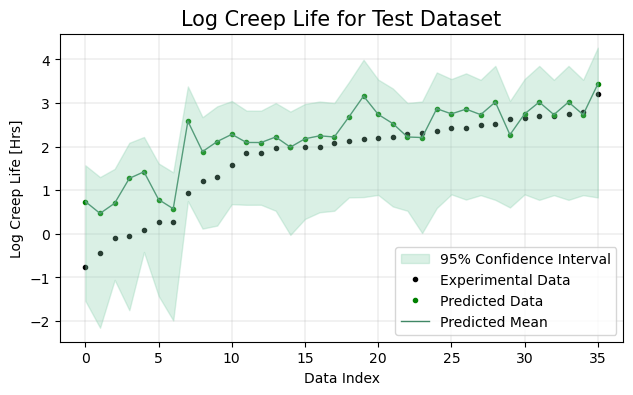

Run # 1 Fold # 2
[iter 0] loss=5.6712 val_loss=6.1871 scale=1.0000 norm=2.2429
[iter 100] loss=5.3011 val_loss=5.9289 scale=1.0000 norm=1.5458
[iter 200] loss=4.9972 val_loss=5.7087 scale=2.0000 norm=2.1913
[iter 300] loss=4.6264 val_loss=5.5621 scale=1.0000 norm=0.8263
== Early stopping achieved.
== Best iteration / VAL337 (val_loss=5.5322)
Pearson CC: 0.7933011418632148
R2 score: 0.6072907954583309
RMSE: 128.06539251406892
MAE: 65.96880342283218
Coverage: 91.66666666666663
Median Interval Width: 221.33631567682178
Composite Metric: 0.6886295028528665


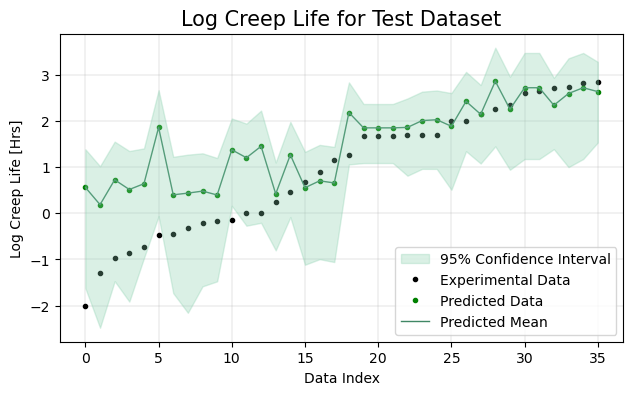

Run # 1 Fold # 3
[iter 0] loss=5.7614 val_loss=5.4915 scale=1.0000 norm=2.3818
[iter 100] loss=5.4064 val_loss=5.2544 scale=1.0000 norm=1.6379
[iter 200] loss=5.1682 val_loss=5.0789 scale=1.0000 norm=1.2268
[iter 300] loss=4.8872 val_loss=4.8983 scale=2.0000 norm=1.9083
[iter 400] loss=4.5963 val_loss=4.8096 scale=2.0000 norm=1.6118
== Early stopping achieved.
== Best iteration / VAL422 (val_loss=4.7917)
Pearson CC: 0.6851884451121605
R2 score: 0.3997074947934779
RMSE: 182.6747568562329
MAE: 109.19071629353364
Coverage: 100.00000000000001
Median Interval Width: 329.43888363144265
Composite Metric: 0.7507588660975422


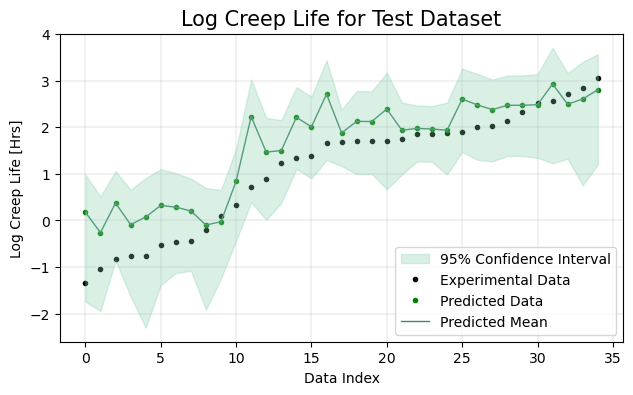

Run # 1 Fold # 4
[iter 0] loss=5.6765 val_loss=5.4503 scale=1.0000 norm=2.4297
[iter 100] loss=5.3032 val_loss=5.1546 scale=1.0000 norm=1.6108
[iter 200] loss=4.9720 val_loss=4.9106 scale=2.0000 norm=2.1569
[iter 300] loss=4.5806 val_loss=4.7254 scale=2.0000 norm=1.6038
== Early stopping achieved.
== Best iteration / VAL311 (val_loss=4.7216)
Pearson CC: 0.09156891843968813
R2 score: -0.020585886977114498
RMSE: 794.6645201670037
MAE: 261.9144788301149
Coverage: 85.71428571428572
Median Interval Width: 877.9593221393027
Composite Metric: 0.643141894090709


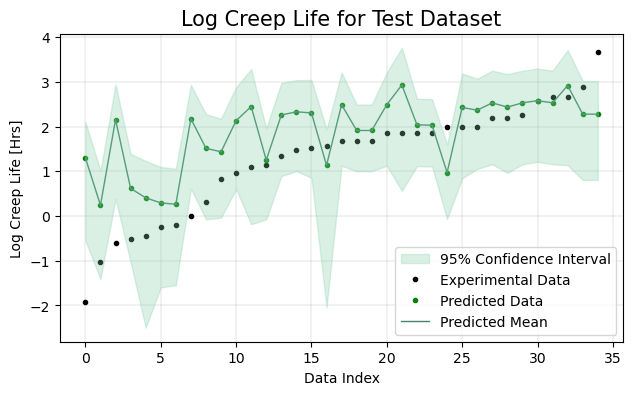

Run # 1 Fold # 5
[iter 0] loss=5.4631 val_loss=5.2751 scale=1.0000 norm=2.5493
[iter 100] loss=5.1142 val_loss=4.9761 scale=1.0000 norm=1.7429
[iter 200] loss=4.8378 val_loss=4.7197 scale=2.0000 norm=2.4563
[iter 300] loss=4.4917 val_loss=4.4154 scale=2.0000 norm=1.7904
[iter 400] loss=4.1466 val_loss=4.1403 scale=2.0000 norm=1.4736
[iter 500] loss=3.8388 val_loss=4.0086 scale=1.0000 norm=0.6464
== Early stopping achieved.
== Best iteration / VAL558 (val_loss=3.9869)
Pearson CC: 0.16138249019562778
R2 score: -0.027044947910298545
RMSE: 829.4979484634961
MAE: 244.77420614717687
Coverage: 82.85714285714286
Median Interval Width: 147.54006098019295
Composite Metric: 0.6231230264690473


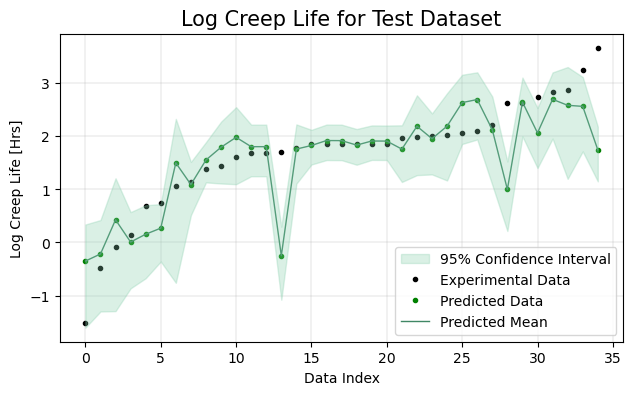

In [26]:
# Evaluate multiple runs of the model
nruns = 1
nfolds = 5

# Metrics for performance evaluation
PearsonCC = np.zeros((nruns, nfolds))
R2_score = np.zeros_like(PearsonCC)
RMSE = np.zeros_like(PearsonCC)
MAE = np.zeros_like(PearsonCC)
MAPE = np.zeros_like(PearsonCC)

test_coverage = np.zeros_like(PearsonCC)
median_interval_width = np.zeros_like(PearsonCC)
composite_metric = np.zeros_like(PearsonCC)
for j in range(nruns):

        kf = KFold(n_splits=nfolds, shuffle=True, random_state=123+j)

        for i, (tr, ts) in enumerate(kf.split(targets)):
            
            # Display the run number
            print('Run #', j+1, "Fold #", i+1)
            
            X_train, X_test = features.iloc[tr], features.iloc[ts]
            y_train, y_test = targets[tr], targets[ts]
            X_train, X_val, y_train, Y_val =train_test_split(X_train, y_train, test_size=0.2, random_state=42)
            
            
            model = NGBRegressor(Dist=LogNormal, n_estimators=1000, learning_rate=0.005)

            model.fit(X_train, y_train, X_val=X_val, Y_val=Y_val, early_stopping_rounds=4)

            y_pred_test = model.predict(X_test)
            
            y_test_ngb = model.pred_dist(X_test)

            PearsonCC[j, i] = pearsonr(y_test, y_pred_test)[0]
            R2_score[j, i] = r2_score(y_test, y_pred_test)
            RMSE[j, i] = sqrt(mean_squared_error(y_pred_test, y_test))
            MAE[j, i] = np.mean(abs(y_pred_test-y_test))
            
            print(f'Pearson CC: {PearsonCC[j, i]}')
            print(f'R2 score: {R2_score[j, i]}')
            print(f'RMSE: {RMSE[j, i]}')
            print(f'MAE: {MAE[j, i]}')
            
            df_test_low = y_test_ngb.interval(0.95)[0]
            df_test_median = y_pred_test
            df_test_high = y_test_ngb.interval(0.95)[1]
            
            test_coverage[j, i] = coverage(y_test, df_test_low, df_test_high)
            
            print(f'Coverage: {test_coverage[j, i]}')
            # Prediction interval width
            median_interval_width[j, i] = np.median(df_test_high - df_test_low)
            print(f'Median Interval Width: {median_interval_width[j, i]}')

            # Composite metric that combines the coverage and the invers of interval width
            composite_metric[j, i] = 0.75*test_coverage[j, i]/100 + 0.25*(1/median_interval_width[j, i])
            print(f'Composite Metric: {composite_metric[j, i]}')


            # Plot the predictions
            fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))
            iteration_list = [i for i in range(len(y_test))]

            y_pred = y_pred_test
            y_std = np.std(np.array(y_pred_test), axis=0)

            ## Uncertainty quantification plot
            ax[0].fill_between(iteration_list, np.log10(df_test_low), np.log10(df_test_high), alpha=0.3, color='#86cfac', zorder=5, label='95% Confidence Interval')
            ax[0].plot(iteration_list, np.log10(y_test), 'ko', markersize=3, label="Experimental Data")
            ax[0].plot(iteration_list, np.log10(y_pred), 'go', markersize=3, label="Predicted Data")
            ax[0].plot(iteration_list, np.log10(y_pred), '-', linewidth=1, color="#408765", label="Predicted Mean")
            ax[0].legend(loc=4, fontsize=10, frameon=True)
            ax[0].set_xlabel("Data Index", fontsize=10)
            ax[0].set_ylabel("Log Creep Life [Hrs]", fontsize=10)
            ax[0].set_title("Log Creep Life for Test Dataset", fontsize=15)
            ax[0].grid(True, which='major', linestyle='-', linewidth='0.25')
            fig.delaxes(ax[1])



            plt.show()

In [27]:
# Data frame
df1 = pd.DataFrame({'Pearson CC': PearsonCC.flatten(), 'R2 Score': R2_score.flatten(), 'RMSE': RMSE.flatten(), 
                    'MAE': MAE.flatten(), 'Coverage': test_coverage.flatten()},index=None)
df1

,Pearson CC,R2 Score,RMSE,MAE,Coverage
0,0.847104,-0.655174,380.244459,229.571181,100.000000
1,0.793301,0.607291,128.065393,65.968803,91.666667
2,0.685188,0.399707,182.674757,109.190716,100.000000
3,0.091569,-0.020586,794.664520,261.914479,85.714286
4,0.161382,-0.027045,829.497948,244.774206,82.857143


In [28]:
# Calculate mean values and standard deviations of the scores
PearsonCC_mean = np.mean(PearsonCC)
R2_score_mean = np.mean(R2_score)
RMSE_mean = np.mean(RMSE)
MAE_mean = np.mean(MAE)
test_coverage_mean = np.mean(test_coverage)

PearsonCC_std = np.std(PearsonCC)
R2_score_std = np.std(R2_score)
RMSE_std = np.std(RMSE)
MAE_std = np.std(MAE)
test_coverage_std = np.std(test_coverage)

# Data frame
df2 = pd.DataFrame({'Pearson CC Mean': PearsonCC_mean, 'Pearson CC Std': PearsonCC_std, 'R2 Score Mean': R2_score_mean, 'R2 Score Std': R2_score_std,
                  'RMSE Mean': RMSE_mean, 'RMSE Std': RMSE_std, 'MAE Mean': MAE_mean, 'MAE Std':MAE_std,
                   'RMSE Std': RMSE_std, 'Test Coverage Mean': test_coverage_mean, 'Test Coverage Std':test_coverage_std},index=[0])
df2

,Pearson CC Mean,Pearson CC Std,R2 Score Mean,R2 Score Std,RMSE Mean,RMSE Std,MAE Mean,MAE Std,Test Coverage Mean,Test Coverage Std
0,0.515709,0.322814,0.060839,0.433698,463.029415,297.299179,182.283877,79.188345,92.047619,7.088044


In [29]:
# Data frame
df3 = pd.DataFrame({'Coverage': test_coverage.flatten(),  'Interval Width': median_interval_width.flatten(), 'Composite Metric': composite_metric.flatten()},index=None)
df3

,Coverage,Interval Width,Composite Metric
0,100.000000,1095.745354,0.750228
1,91.666667,221.336316,0.688630
2,100.000000,329.438884,0.750759
3,85.714286,877.959322,0.643142
4,82.857143,147.540061,0.623123


In [30]:
# Calculate mean values and standard deviations of the scores
test_coverage_mean = np.mean(test_coverage)

median_interval_width_mean = np.mean(median_interval_width)
composite_metric_mean = np.mean(composite_metric)

test_coverage_std = np.std(test_coverage)

median_interval_width_std = np.std(median_interval_width)
composite_metric_std = np.std(composite_metric)

# Data frame
df4 = pd.DataFrame({'Coverage Mean': test_coverage_mean, 'Coverage Std': test_coverage_std,
                    'Interval Width Mean': median_interval_width_mean, 'Interval Width Std':median_interval_width_std,
                   'Composite Metric Mean': composite_metric_mean, 'Composite Metric Std': composite_metric_std,},index=[0])
df4

,Coverage Mean,Coverage Std,Interval Width Mean,Interval Width Std,Composite Metric Mean,Composite Metric Std
0,92.047619,7.088044,534.403987,380.215769,0.691176,0.052881
